In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../src/')

In [3]:
# Import PCA functions
from pca import PCA

In [4]:
# Import utils function
from utils import load_model, dot_dict

#### 1. Load Petrel Models

In [5]:
data_dir = './data'

In [8]:
args = {}
args['m_petrel'] = os.path.join(data_dir, 'logkmud_petrel_train3000_case3.h5')  # Petrel training models
args = dot_dict(args)

In [9]:
# Load m_petrel
m_petrel = load_model(args.m_petrel).astype(np.float32)
m_petrel.shape

(3000, 40, 60, 60, 1)

In [10]:
nr, nz, nx, ny, _ = m_petrel.shape
m_petrel.shape

(3000, 40, 60, 60, 1)

#### 2. Construct PCA

In [11]:
pca_model = PCA(nc=nx*ny*nz, nr=nr, l=3000)

In [12]:
pca_model.construct_pca(m_petrel.reshape((nr, nx*ny*nz)).T)

In [13]:
pca_model.usig.shape

(144000, 3000)

In [14]:
pca_model.xm.shape

(144000, 1)

#### 3. Plot Relative Energy

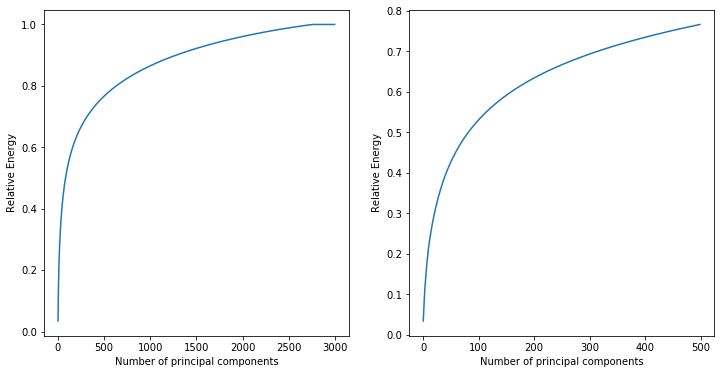

In [15]:
cum_energy = np.cumsum(pca_model.sig**2)
rel_energy = cum_energy / cum_energy[-1]

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(rel_energy)
plt.ylabel('Relative Energy')
plt.xlabel('Number of principal components')
plt.subplot(1,2,2)
plt.plot(rel_energy[:500])
plt.ylabel('Relative Energy')
plt.xlabel('Number of principal components')
plt.show()

In [16]:
print('The first 200 principal components explains %.1f percent of energy' % (100*rel_energy[200]))

The first 200 principal components explains 63.5 percent of energy


#### 4. Generate Test PCA Models

In [17]:
np.random.seed(12345)

In [18]:
dim =200
ntest = 200
xi_test = np.random.normal(0,1,(dim, ntest))
m_pca_test = pca_model.generate_pca_realization(xi_test, dim).T
m_pca_test = m_pca_test.reshape((ntest, nz, nx, ny, 1))
m_pca_test.shape

(200, 40, 60, 60, 1)

#### 5. Save models to file

In [54]:
fn = h5py.File(os.path.join(data_dir,'logkmud_mpca_test200_case3.h5'), 'w')
fn.create_dataset('data', data=m_pca_test.astype('float16'))
fn.close()

In [19]:
exit()